# SARSA

In [99]:
import random
import numpy as np
from frozen_lake import FrozenLake
import matplotlib.pyplot as plt

from utils import plot_values, format_plot

In [100]:
env = FrozenLake()

In [101]:
num_states = 16
num_actions = 4

Q_values = np.zeros((num_states, num_actions))
epsilon = 0.1
learning_rate = 0.5
DISCOUNT_FACTOR = 0.9

NUM_EPISODES = 10_000

In [102]:
# We train the agent for several episodes
for episode in range(NUM_EPISODES):

    done = False
    state = env.reset()

    # ε-greedy policy to select actions
    # select random action with probability ε
    # |---------------ε----|
    # 0                    1
    if random.uniform(0, 1) < epsilon:
        action = random.choice([0, 1, 2, 3])
    else:
        q_values = Q_values[state]
        optimal_actions =  np.flatnonzero(q_values == max(q_values))
        action = np.random.choice(optimal_actions)

    while not done:

        # take a step in the environment
        next_state, reward, done = env.step(action)

        ## SARSA
        
        # ε-greedy policy to select actions
        # select random action with probability ε
        # |---------------ε----|
        # 0                    1
        if random.uniform(0, 1) < epsilon:
            next_action = random.choice([0, 1, 2, 3])
        # select greedy action
        # simply act greedily wrt Q values
        else:
            q_values = Q_values[next_state]
            optimal_actions =  np.flatnonzero(q_values == max(q_values))
            next_action = np.random.choice(optimal_actions)

        # get current Q values
        old_q = Q_values[state, action]
        
        # compute value of next_state
        # V(s') = max_a Q(s', a)
        # note that we compute 
        future_value = Q_values[next_state, next_action] * int(1 - done)

        # compute TD target
        TD_target = reward + DISCOUNT_FACTOR * future_value

        Q_values[state, action] = Q_values[state, action] + learning_rate * (TD_target - old_q)

        # update the state and action
        state = next_state
        action = next_action

value_function = np.max(Q_values, axis=1)

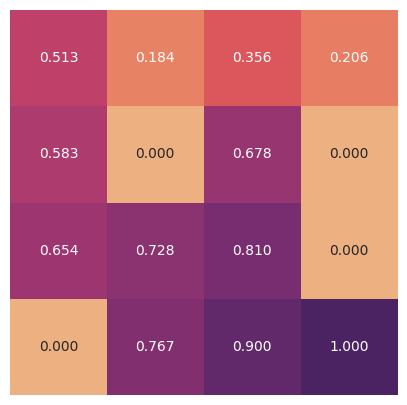

In [103]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_values(ax, value_function)
format_plot(ax)